### Technic 1. 데이터 읽어들이기

In [4]:
import pandas as pd

In [5]:
customer_mas = pd.read_csv("customer_master.csv")
customer_mas.head() #다섯줄만 떼어와서 잘 불러들였나 확인하기

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [6]:
item_mas = pd.read_csv("item_master.csv")
item_mas.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [7]:
trx1 = pd.read_csv('transaction_1.csv')
trx1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [8]:
trx2 = pd.read_csv('transaction_2.csv')
trx2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [9]:
trx_detail_1 = pd.read_csv("transaction_detail_1.csv")
trx_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [10]:
trx_detail_2 = pd.read_csv("transaction_detail_2.csv")
trx_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


### Technic 2. 데이터 결합 (유니언) --> 합집합 개념

In [11]:
trx = pd.concat([trx1, trx2])
trx.head()
#위에 다섯개만 뽑아보면 아래가 잘 붙었는지 확인이 안됨 -> union 결과확인이 필요

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [12]:
#union 결과확인

print(len(trx1))
print(len(trx2))
print(len(trx))

5000
1786
6786


In [13]:
trx_detail = pd.concat([trx_detail_1, trx_detail_2])
trx_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [14]:
print(len(trx_detail_1))
print(len(trx_detail_2))
print(len(trx_detail))

5000
2144
7144


### Technic 3. 데이터 결합 (조인) --> 교집합 개념

In [15]:
trx_join = pd.merge(trx_detail, trx, how='left', on='transaction_id')
trx_join

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,180000,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,85000,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,100000,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,85000,2019-07-31 23:39:35,TS624738


In [16]:
trx_join_final = pd.merge(trx_join, customer_mas, how='left', on='customer_id')
trx_join_final = pd.merge(trx_join_final, item_mas, how='left', on='item_id')
trx_join_final.head()

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


### Technic 4. 필요한 컬럼을 만들자

In [17]:
trx_join_final["total_price"] = trx_join_final["quantity"] * trx_join_final["item_price"]
trx_join_final.head()

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000


### Technic 5. 검산

In [18]:
print(trx_join_final["total_price"].sum())
print(trx["price"].sum())

971135000
971135000


In [19]:
trx_join_final["total_price"].sum()  ==  trx["price"].sum()

True

### Technic 6. 각종 통계량 검사

In [20]:
trx_join_final.isnull().sum() #null이 있는지 검사하는 방법, 컬럼별로 null이 몇개인지 보여줌

detail_id            0
transaction_id       0
item_id              0
quantity             0
price                0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
total_price          0
dtype: int64

In [21]:
trx_join_final.describe()

,detail_id,quantity,price,age,item_price,total_price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,150440.929451,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,85991.561558,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,85000.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,135000.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,210000.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,750000.000000,80.000000,210000.000000,420000.000000


In [22]:
print(trx_join_final["payment_date"].min())
print(trx_join_final["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### Technic 7. 월별 매출 구하기 (groupby)

In [25]:
trx_join_final.dtypes #컬럼별 데이터의 유형을 보여줌

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
price                 int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
total_price           int64
dtype: object

In [32]:
trx_join_final["payment_date"] = pd.to_datetime(trx_join_final["payment_date"])
#trx_join_final 시트의 payment date 컬럼을 pd.to_datetime으로 덮어쓰겠다
#형식만 object에서 datetime로 바뀜, 실재 내용은 다음줄에서 바뀜

trx_join_final["payment_month"] = trx_join_final["payment_date"].dt.strftime("%Y%m")
#위에서 바뀐 컬럼을 payment_month라는 새로운 컬럼으로 형성에 기입하겠다

trx_join_final[["payment_month", "item_name"]].head()
#추가된 컬럼에서 상위 다섯개만 뽑아봄
#여러 컬럼을 동시에 뽑으려면 [[]] 이용

,payment_month,item_name
0,201902,PC-E
1,201902,PC-A
2,201902,PC-C
3,201902,PC-E
4,201902,PC-B


In [34]:
trx_join_final.groupby("payment_month").sum()["total_price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: total_price, dtype: int64

In [35]:
trx_join_final.groupby("payment_month").sum()["quantity"]

payment_month
201902    1403
201903    1427
201904    1421
201905    1390
201906    1446
201907    1485
Name: quantity, dtype: int64

In [38]:
trx_join_final.groupby(["payment_month", "item_name"]).sum()[["quantity", "total_price"]]
#첫번째 컬럼에서는 month별로 groupping, 두번째 컬럼에서는 아이템별로 groupping

quantity  total_price
payment_month item_name                       
201902        PC-A            483     24150000
              PC-B            297     25245000
              PC-C            165     19800000
              PC-D            173     31140000
              PC-E            285     59850000
201903        PC-A            520     26000000
              PC-B            300     25500000
              PC-C            159     19080000
              PC-D            143     25740000
              PC-E            305     64050000
201904        PC-A            518     25900000
              PC-B            276     23460000
              PC-C            183     21960000
              PC-D            135     24300000
              PC-E            309     64890000
201905        PC-A            497     24850000
              PC-B            298     25330000
              PC-C            171     20520000
              PC-D            144     25920000
              PC-E            280     58800000
201906        PC-A            520     26000000
              PC-B            282     23970000
              PC-C            182     21840000
              PC-D            160     28800000
              PC-E            302     63420000
201907        PC-A            505     25250000
              PC-B            332     28220000
              PC-C            162     19440000
              PC-D            145     26100000
              PC-E            341     71610000

### Technic8.  피벗테이블 (월별/상품별 데이터 집계)

In [41]:
#순서  :  테이블 이름 -> index(기준으로 할 컬럼을 지정/세로축)= -> columns(가로축)= -> values= -> aggfunc
pivottable = pd.pivot_table(trx_join_final, index="payment_month", columns="item_name", values="total_price", aggfunc="sum")
print(pivottable)

item_name          PC-A      PC-B      PC-C      PC-D      PC-E
payment_month                                                  
201902         24150000  25245000  19800000  31140000  59850000
201903         26000000  25500000  19080000  25740000  64050000
201904         25900000  23460000  21960000  24300000  64890000
201905         24850000  25330000  20520000  25920000  58800000
201906         26000000  23970000  21840000  28800000  63420000
201907         25250000  28220000  19440000  26100000  71610000


In [43]:
#pivot table 바탕으로 그래프 그리기

#cmd 창 새로 열어서 pip install matplotlib 실행 -> 처음에 한번 설치해줘야함
import matplotlib.pyplot as plt

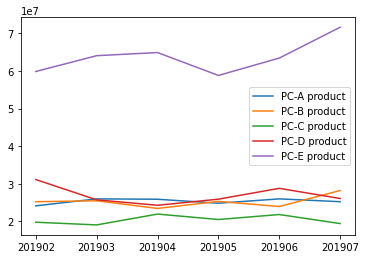

In [50]:
#plot이라는 함수 작성 (가로축으로 뭐가 들어갈지 지정 -> 세로축으로 뭐가 들어갈지 지정 -> label=실재 나타나는 그래프의 이름)
#가로축만 list로 씌워서 작성

plt.plot(list(pivottable.index), pivottable["PC-A"], label="PC-A product")
plt.plot(list(pivottable.index), pivottable["PC-B"], label="PC-B product")
plt.plot(list(pivottable.index), pivottable["PC-C"], label="PC-C product")
plt.plot(list(pivottable.index), pivottable["PC-D"], label="PC-D product")
plt.plot(list(pivottable.index), pivottable["PC-E"], label="PC-E product")
plt.legend()